## Observations and Insights 

* There were 10 types of drugs used for testing on mice in which Capomulin and Ramicane had the most total numbers of timepoints while Propriva experienced the least timepoint number.
* The tests were done in both female and male mice with the numbers of 49% and 51% relatively.
* When timepoint increased, it seemed to be a decrease in the tumour volume spent for a particular mouse (example: Mouse ID - m601).
* There seemed to be a positive relationship between average tumour volume and mouse weight for a regimen (example: Capomulin regimen)


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview
combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
n_mice = combined["Mouse ID"].nunique()
print(f"The number of mice is {n_mice}")

The number of mice is 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup = combined.loc[combined.duplicated(subset =["Mouse ID", "Timepoint"]) == True,"Mouse ID"].unique()
print(dup)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_data = combined[combined["Mouse ID"].isin(dup)==True]
print(dup_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_combined = combined[combined["Mouse ID"].isin(dup)==False]
cleaned_combined


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
n_mice = cleaned_combined["Mouse ID"].nunique()
print(f"The number of mice is {n_mice}")

The number of mice is 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 

grouped_regimen = cleaned_combined.groupby(["Drug Regimen"])

mean = grouped_regimen["Tumour Volume (mm3)"].mean()

median = grouped_regimen["Tumour Volume (mm3)"].median()

var = grouped_regimen["Tumour Volume (mm3)"].var()

std = grouped_regimen["Tumour Volume (mm3)"].std()

sem = grouped_regimen["Tumour Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

regimen_sum = pd.DataFrame({"Mean": mean
                             , "Median": median
                             , "Variance": var
                             , "Standard Deviataion": std
                             , "SEM": sem
                            })
print(regimen_sum)

                   Mean     Median   Variance  Standard Deviataion       SEM
Drug Regimen                                                                
Capomulin     40.675741  41.557809  24.947764             4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177             6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684             6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577             8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479             8.134708  0.596466
Placebo       54.033581  52.288934  61.168083             7.821003  0.581331
Propriva      52.320930  50.446266  43.852013             6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704             4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562             7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355             6.966589  0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
cleaned_combined.groupby(["Drug Regimen"]).agg({"Tumour Volume (mm3)": ["mean", "median","var","std","sem"]})

Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

[Text(0, 0, 'Capomulin'),
 Text(1, 0, 'Ceftamin'),
 Text(2, 0, 'Infubinol'),
 Text(3, 0, 'Ketapril'),
 Text(4, 0, 'Naftisol'),
 Text(5, 0, 'Placebo'),
 Text(6, 0, 'Propriva'),
 Text(7, 0, 'Ramicane'),
 Text(8, 0, 'Stelasyn'),
 Text(9, 0, 'Zoniferol')]

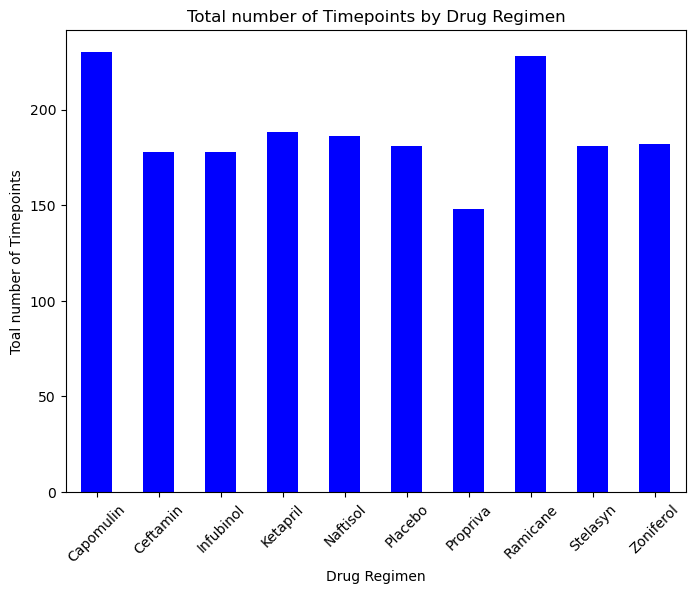

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Filter the DataFrame down only to those columns to chart
tp_count = grouped_regimen["Timepoint"].count()

# Use Pandas - DataFrame to plot the bar chart
bar_plot = tp_count.plot(kind="bar",figsize = (8,6), color = 'b', width=0.5, align="center", title = "Total number of Timepoints by Drug Regimen")

# Set the title and labels of the chart
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Toal number of Timepoints")

# FOrmat the x axis labels
bar_plot.set_xticklabels(tp_count.index, rotation=45)


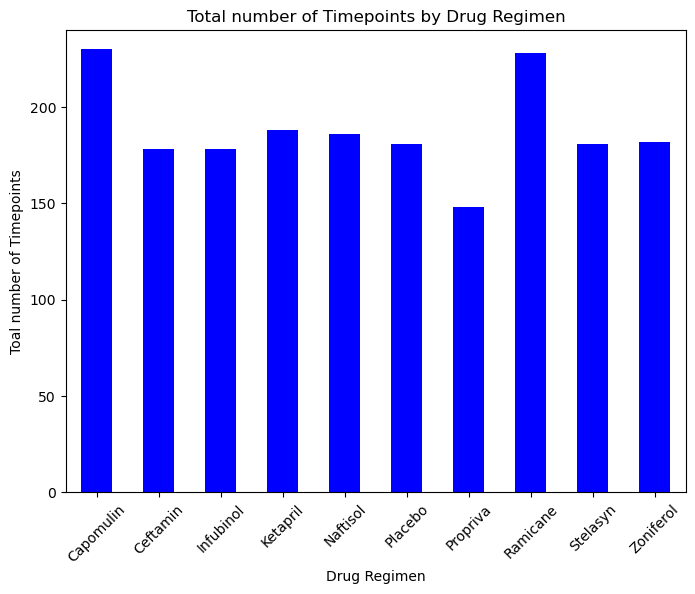

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Set x axis and tick locations
x_axis = range(len(grouped_regimen))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,6))
plt.bar(x_axis, grouped_regimen.count()["Timepoint"], color='b', width=0.5,  align="center")
plt.xticks(tick_locations, grouped_regimen.count().index, rotation=45)

# Set x and y limits
plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(0, max(grouped_regimen.count()["Timepoint"])+10)

# Set a Title and labels
plt.title("Total number of Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Toal number of Timepoints")

# Show the grap
plt.show()

Text(0, 0.5, 'Number of mice')

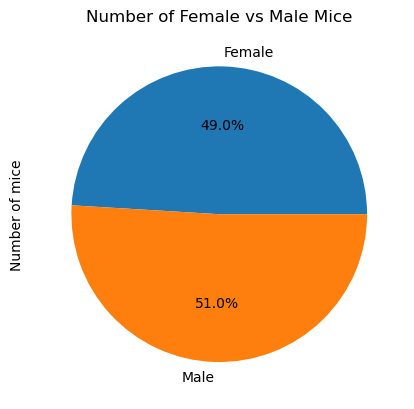

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Create data to plot
gender = cleaned_combined.groupby(["Sex"])["Mouse ID"].count()

# Plot the chart using Pandas Dataframe
pie_plot = gender.plot(kind="pie", title = "Number of Female vs Male Mice", autopct = "%1.1f%%")

# Set label for y axis
pie_plot.set_ylabel("Number of mice")

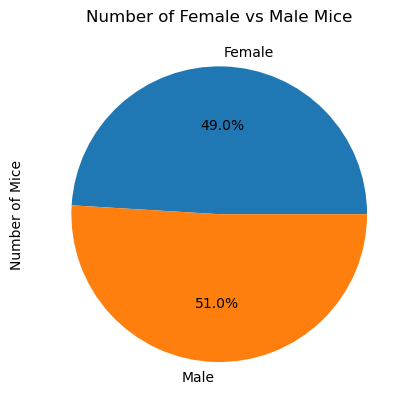

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Find out sizes and labels for the pie chart
gender = cleaned_combined.groupby(["Sex"])["Mouse ID"].count()
labels = gender.index
sizes = gender

# Plot pie chart using pyplot
plt.pie(sizes, labels = labels, autopct ="%1.1f%%")

# Setup title and y axis label
plt.title("Number of Female vs Male Mice")
plt.ylabel("Number of Mice")

# Show the pie chart
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cleaned_combined

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_id = cleaned_combined.groupby(["Mouse ID"]).max()[["Timepoint"]]

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
last_timepoint_tv = pd.merge(cleaned_combined,last_timepoint_id, on = ["Mouse ID", "Timepoint"], how = "inner")

# Filter down to only 4 selected regimens Capomulin, Ramicane, Infubinol, and Ceftamin and reset index
selected_data = last_timepoint_tv[last_timepoint_tv["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]) == True]#[["Mouse ID","Drug Regimen","Mouse ID"]]
selected_data = selected_data.reset_index(drop = True)

print(selected_data)

   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      k403     Ramicane    Male          21          16         45   
1      s185    Capomulin  Female           3          17         45   
2      x401    Capomulin  Female          16          15         45   
3      m601    Capomulin    Male          22          17         45   
4      g791     Ramicane    Male          11          16         45   
..      ...          ...     ...         ...         ...        ...   
95     x822     Ceftamin    Male           3          29         45   
96     y163    Infubinol  Female          17          27         45   
97     y769     Ceftamin  Female           6          27         45   
98     y865     Ceftamin    Male          23          26         45   
99     z581    Infubinol  Female          24          25         45   

    Tumour Volume (mm3)  Metastatic Sites  
0             22.050126                 1  
1             23.343598                 1  
2             2

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumour vol data (for plotting)
tumour_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#     Locate the rows which contain mice on each drug and get the tumour volumes

for drug in treatments:
    tumour_vol_final = selected_data.loc[selected_data["Drug Regimen"] == drug,:]["Tumour Volume (mm3)"]

    # add subset 
    tumour_vol.append(tumour_vol_final)
    
    # Determine outliers using upper and lower bounds
    
    quartiles = tumour_vol_final.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of the tumour volumes for {drug} is: {lowerq}")
    print(f"The upper quartile of the tumour volumes for {drug} is: {upperq}")
    print(f"The interquartile range of the tumour volumes for {drug} is: {iqr}")
    print(f"The the median of the tumour volumes for {drug} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("------------------------------------------------------------------")
     

The lower quartile of the tumour volumes for Capomulin is: 32.37735684
The upper quartile of the tumour volumes for Capomulin is: 40.1592203
The interquartile range of the tumour volumes for Capomulin is: 7.781863460000004
The the median of the tumour volumes for Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
------------------------------------------------------------------
The lower quartile of the tumour volumes for Ramicane is: 31.56046955
The upper quartile of the tumour volumes for Ramicane is: 40.65900627
The interquartile range of the tumour volumes for Ramicane is: 9.098536719999998
The the median of the tumour volumes for Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
------------------------------------------------------------------
The lower quartile of the tumour volumes for Infubinol is: 54.04860769
The upper quartile of the tu

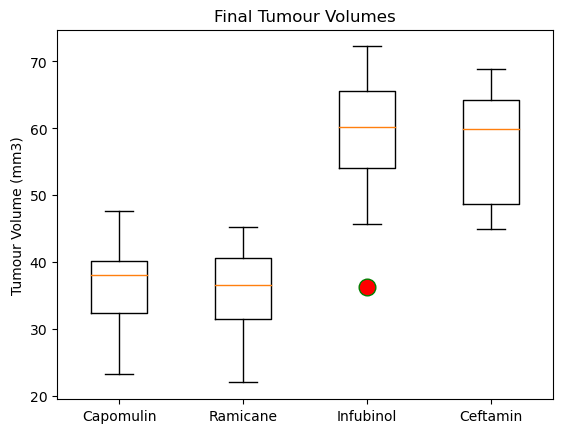

In [15]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumour Volumes')
ax1.set_ylabel('Tumour Volume (mm3)')
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
ax1.boxplot(tumour_vol, flierprops=flierprops, labels = treatments)
plt.show()



## Line and Scatter Plots

Text(0.5, 1.0, 'Tumour Volume by Time Point for Mouse ID - m601')

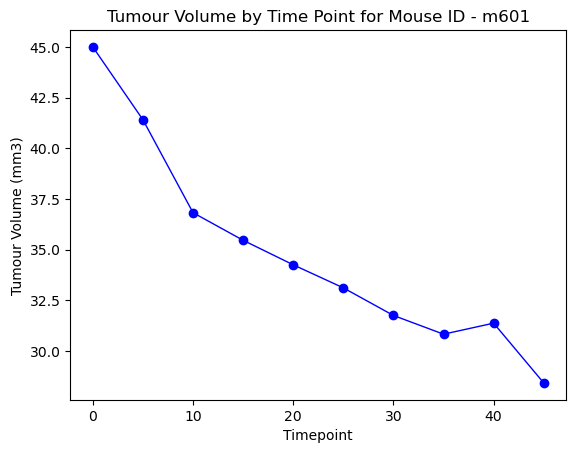

In [16]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
cleaned_combined.head()
selected_mouse = "m601"
data = cleaned_combined.loc[cleaned_combined["Mouse ID"]== selected_mouse,:]
x_axis = data["Timepoint"]
y_axis = data["Tumour Volume (mm3)"]
plt.plot(x_axis, y_axis, marker = "o", color = "blue", linewidth = 1)
plt.xlabel("Timepoint")
plt.ylabel("Tumour Volume (mm3)")
plt.title(f"Tumour Volume by Time Point for Mouse ID - {selected_mouse}")

Text(0.5, 1.0, 'Average Tumour Volume vs Mouse Weight')

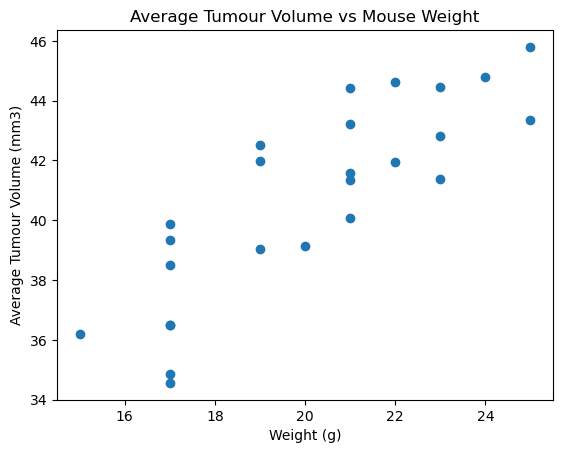

In [17]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
capomulin_regimen = cleaned_combined.loc[cleaned_combined["Drug Regimen"]=="Capomulin",:]
avg_capomulin = capomulin_regimen.groupby("Mouse ID").mean()

x_values = avg_capomulin["Weight (g)"]
y_values = avg_capomulin["Tumour Volume (mm3)"]

plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumour Volume (mm3)")
plt.title("Average Tumour Volume vs Mouse Weight")

## Correlation and Regression

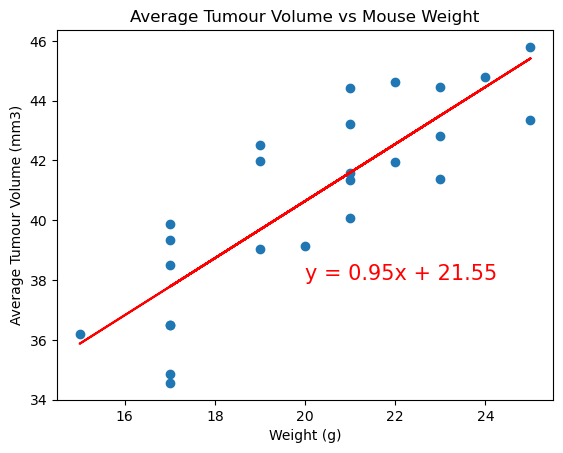

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
x_values = avg_capomulin["Weight (g)"]
y_values = avg_capomulin["Tumour Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumour Volume (mm3)")
plt.title("Average Tumour Volume vs Mouse Weight")
plt.show()